### Regression Tree

In [101]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [102]:
import pandas as pd

df = pd.read_csv('PCA_final.csv')

In [103]:
X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death', 
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism']]
y = df['inc_case']

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (850, 12), y shape: (850,)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (680, 12), y_train shape: (680,)
X_test shape: (170, 12), y_test shape: (170,)


#### Random Forest

In [105]:
# Define an Random Forest object using RandomForestRegressor 
regression_tree = RandomForestRegressor()
# Fit the model
regression_tree.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
# Make predictions
y_pred = regression_tree.predict(X_test)

In [107]:
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 11248783620.852367
Root Mean Squared Error: 106060.28295668632


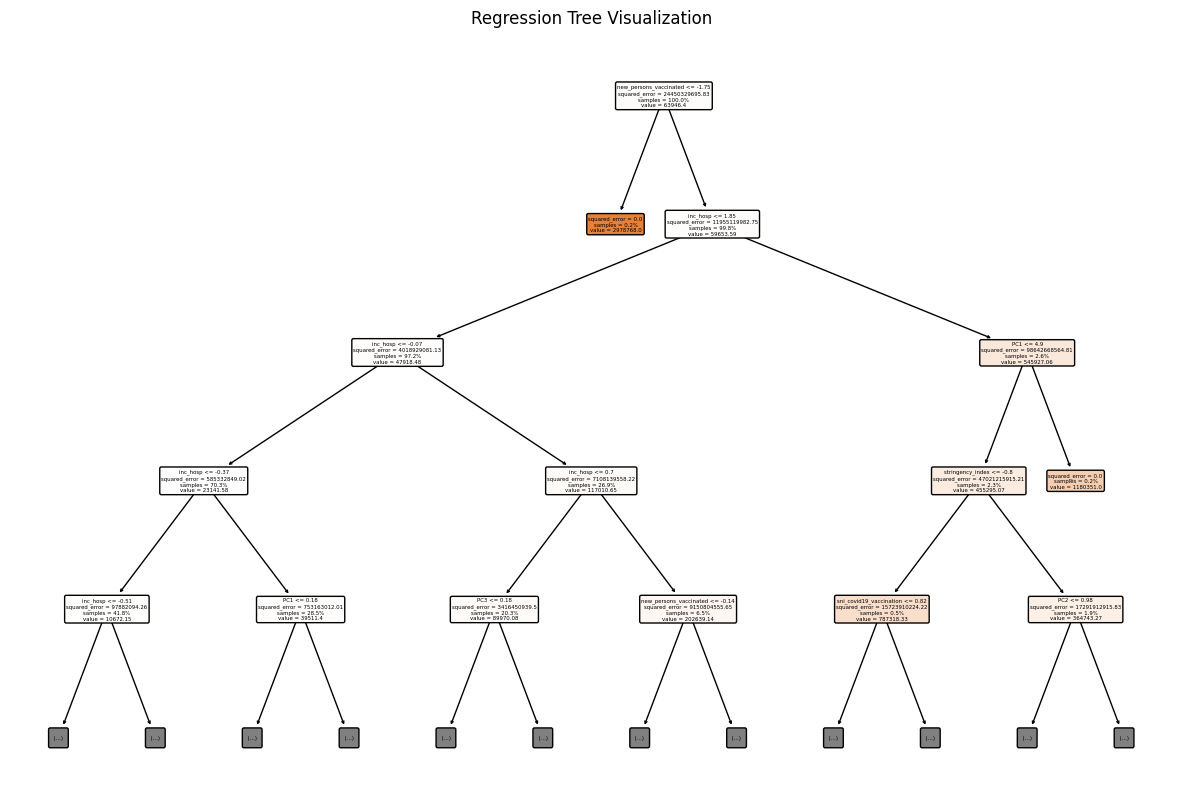

In [120]:
# Visualize the regression tree using plot_tree
individual_tree = regression_tree.estimators_[0] 

plt.figure(figsize=(15, 10))
plot_tree(individual_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2, max_depth= 4)
plt.title("Regression Tree Visualization")
plt.show()

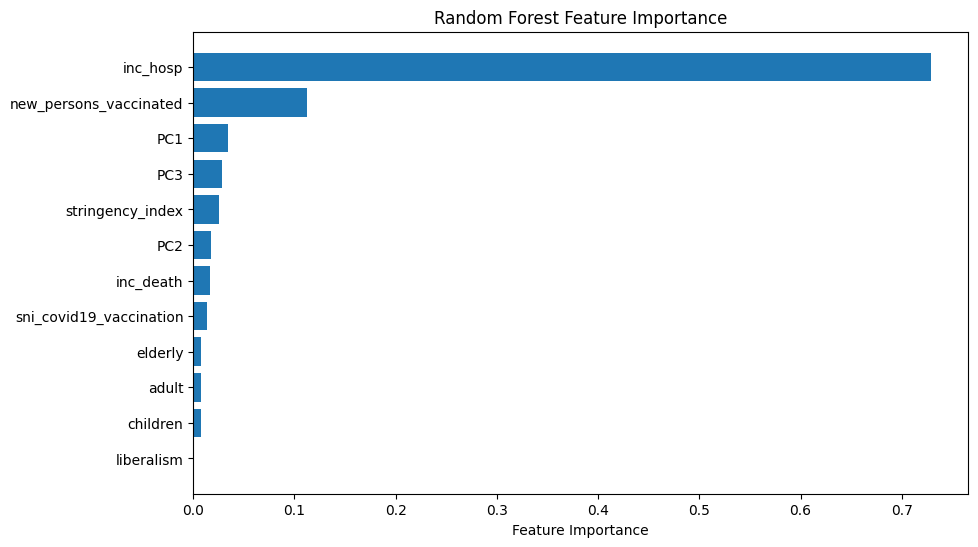

In [109]:
# Get feature importances from the random forest model
feature_importances = regression_tree.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

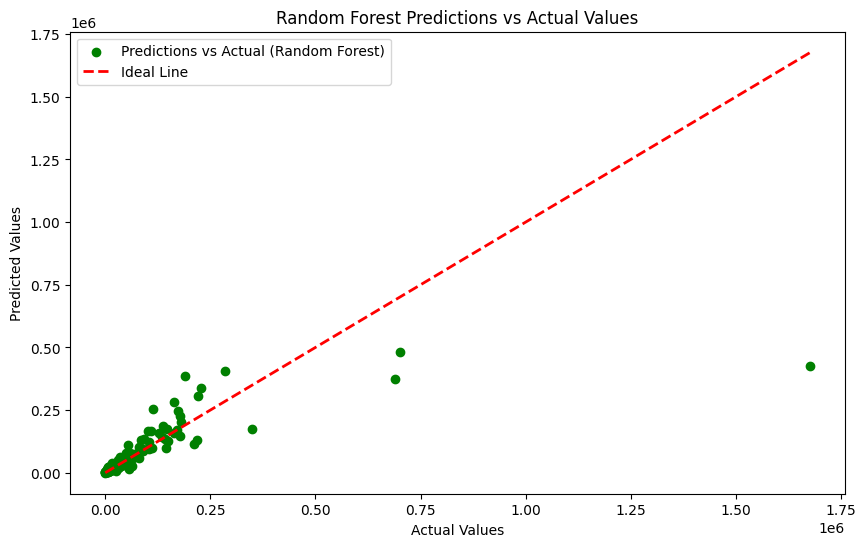

In [110]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

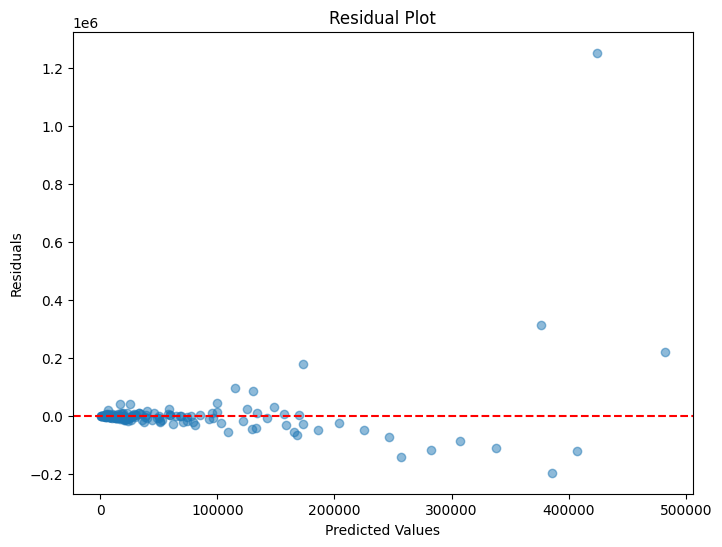

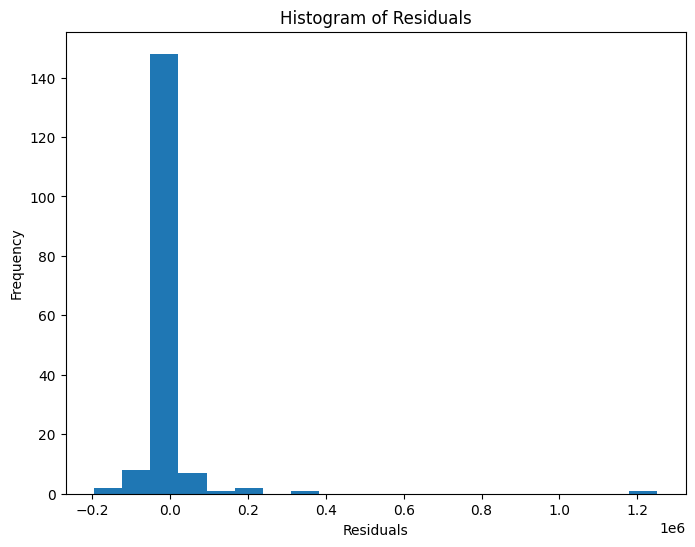

In [111]:
#Calculate Residuals
residuals = y_test - y_pred

#Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Bagging

In [112]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Defining and fitting the model
# 50 base estimators (linear regression models) are trained with different subsets of the training data
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')
print(f'Root Mean Squared Error (Bagging): {rmse_bagging}')

Mean Squared Error (Bagging): 8229859547.96439
Root Mean Squared Error (Bagging): 90718.5733351467


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


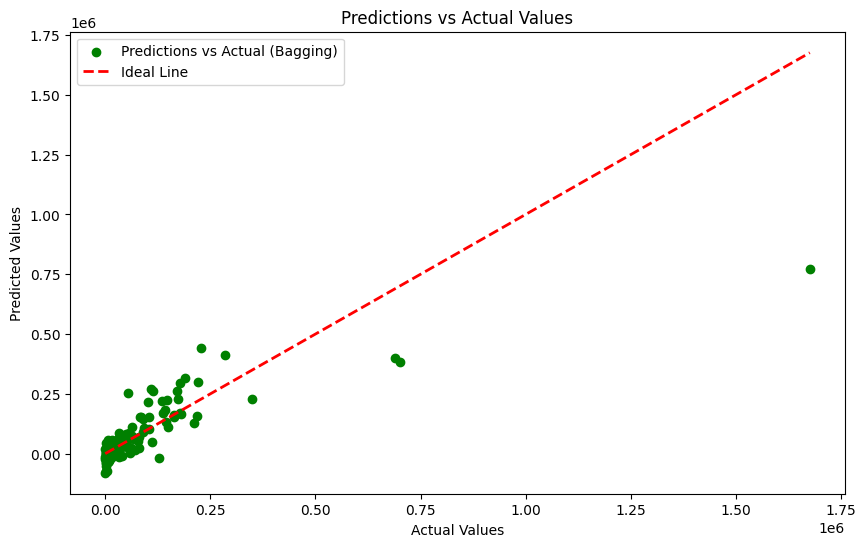

In [113]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### AdaBoost Regressor

In [114]:
from sklearn.ensemble import AdaBoostRegressor

# Defining and fitting the model
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')
print(f'Root Mean Squared Error (AdaBoost): {rmse_adaboost}')

Mean Squared Error (AdaBoost): 14853321044.956469
Root Mean Squared Error (AdaBoost): 121874.20172028398


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


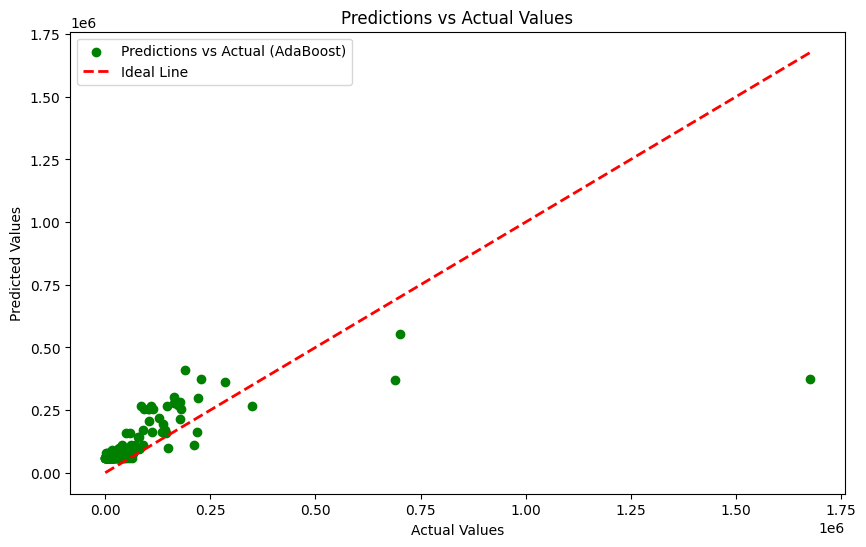

In [115]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### XGBoost Regressor

In [116]:
!pip install xgboost

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nose-1.3.7-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [117]:
from xgboost import XGBRegressor

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error: {rmse}')

# Calculate coverage
coverage = np.mean((y_test >= np.min(y_pred_xgb)) & (y_test <= np.max(y_pred_xgb))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(y_pred_xgb - y_test)
print(f'Bias: {bias:.2f}')

Mean Squared Error (XGBoost): 11030922089.675026
Root Mean Squared Error: 105028.19664106885
Coverage: 98.24%
Bias: -7271.62


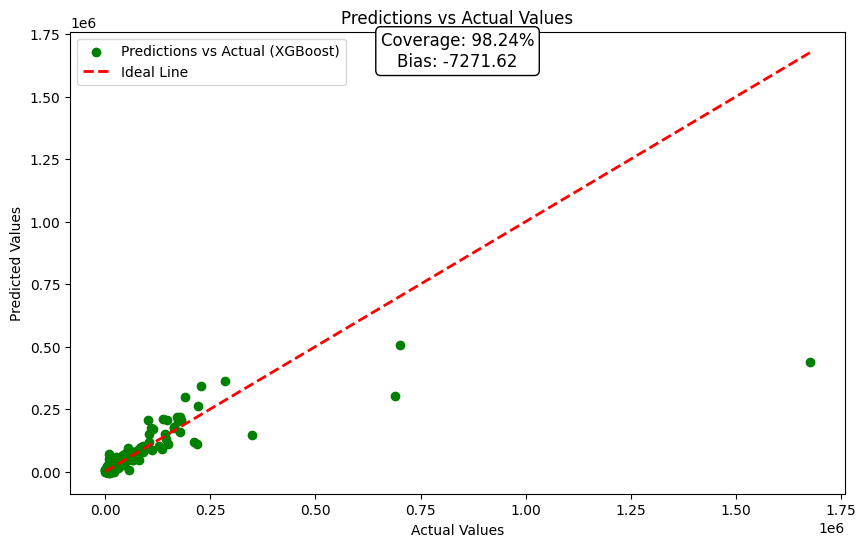

In [118]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')

# Draw the box
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
plt.text((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1], '\n'.join([
    f'Coverage: {coverage:.2f}%',
    f'Bias: {bias:.2f}'
]), verticalalignment='top', horizontalalignment='center', fontsize=12, bbox=bbox_props)

plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


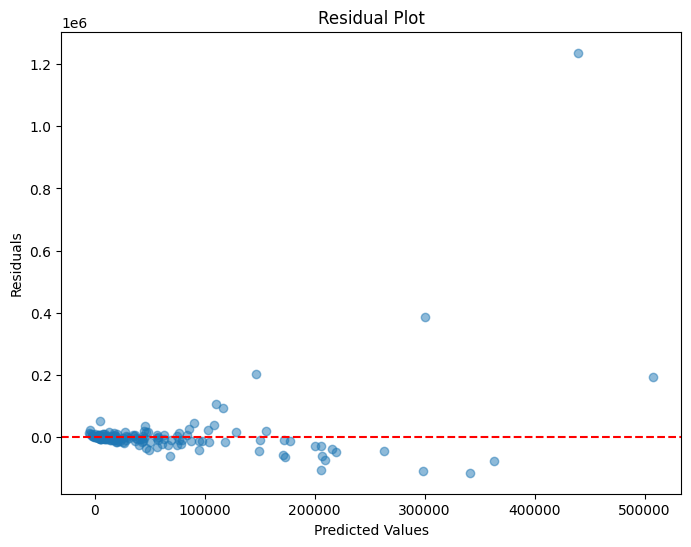

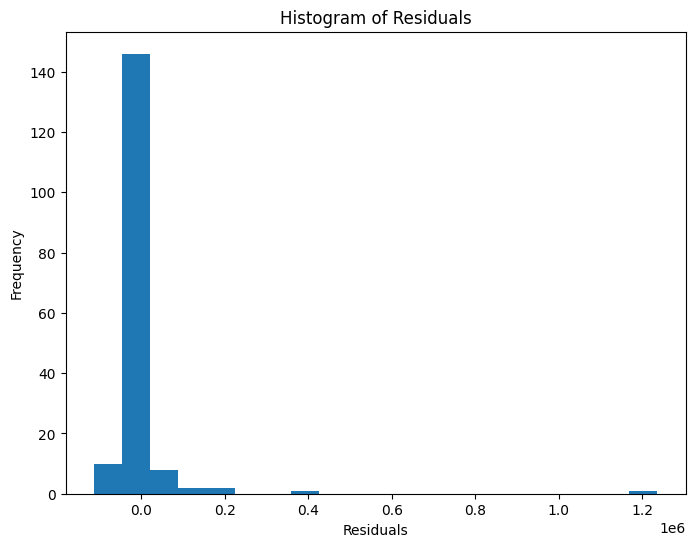

In [119]:
#Calculate Residuals
residuals = y_test - y_pred_xgb

#Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()